#### **Universidade Federal de Goiás**
#### **Nome: Heinrych Matheus Gomes Andrade**
#### **Matrícula: 201802726**

## Treinando o modelo, o do prof deu erro

In [1]:
!pip install -q gradio
!pip install -q datasets
!pip install -q timm #==0.4.12

In [2]:
from fastai.vision.all import *
import timm

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

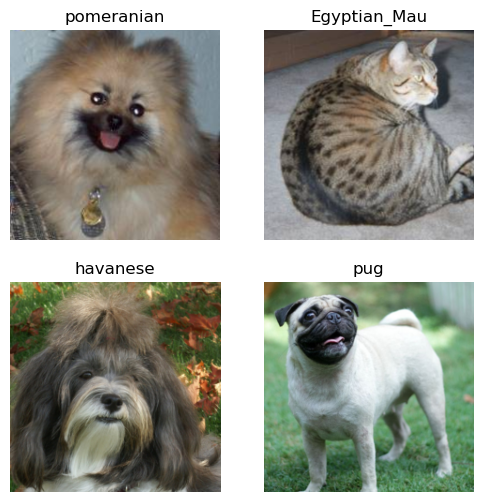

In [4]:
dls.show_batch(max_n=4)

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 100MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.484387,0.330946,0.101489,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.438572,0.288790,0.095399,00:50
1,0.285695,0.269540,0.081867,00:59
2,0.140114,0.226992,0.064953,00:59


In [6]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [7]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time
0,1.096088,0.280851,0.094723,02:07


epoch,train_loss,valid_loss,error_rate,time
0,0.265658,0.201924,0.073748,02:21
1,0.184570,0.187739,0.060217,02:22
2,0.125996,0.174901,0.052097,02:22


In [8]:
learn.export('model15.pkl')

# PARTE 01

In [9]:
!pip install -q torch==2.0.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 2.0.1 which is incompatible.


In [10]:
! git clone --depth 1 https://huggingface.co/spaces/jph00/pets


Cloning into 'pets'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 240.34 KiB | 1.51 MiB/s, done.


In [11]:
!dir

__notebook_source__.ipynb  model15.pkl	pets


In [12]:
%cd pets

/kaggle/working/pets


In [13]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

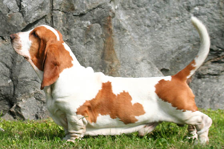

In [14]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [15]:
!dir


README.md  app.py      model.pkl	 train.ipynb
app.ipynb  basset.jpg  requirements.txt


In [17]:
#export
learn = load_learner('/kaggle/working/model15.pkl')

In [18]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([5.5391e-06, 3.6052e-05, 2.8531e-07, 3.6565e-07, 3.3274e-06, 4.2743e-05,
         6.4902e-06, 3.9220e-06, 1.6142e-06, 8.4133e-07, 1.6026e-06, 3.3226e-06,
         1.4100e-04, 4.4559e-05, 9.9355e-01, 5.4741e-03, 3.0038e-05, 1.1416e-07,
         3.6260e-05, 3.0835e-06, 1.6727e-05, 9.6841e-06, 3.1789e-06, 3.9443e-05,
         8.2769e-06, 1.4305e-06, 1.2344e-06, 9.0315e-06, 4.9164e-06, 4.4330e-06,
         5.0512e-04, 8.6175e-07, 7.1395e-07, 3.9311e-07, 4.1806e-06, 7.4604e-07,
         1.2067e-06]))

In [19]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [20]:
classify_image(im)

{'Abyssinian': 5.539141511690104e-06,
 'Bengal': 3.605191159294918e-05,
 'Birman': 2.8530777740343183e-07,
 'Bombay': 3.6565378991326725e-07,
 'British_Shorthair': 3.3273620374529855e-06,
 'Egyptian_Mau': 4.2743351514218375e-05,
 'Maine_Coon': 6.490188752650283e-06,
 'Persian': 3.921955794794485e-06,
 'Ragdoll': 1.6141990499818348e-06,
 'Russian_Blue': 8.413330192524882e-07,
 'Siamese': 1.6025677496145363e-06,
 'Sphynx': 3.3226215236936696e-06,
 'american_bulldog': 0.00014099637337494642,
 'american_pit_bull_terrier': 4.455881935427897e-05,
 'basset_hound': 0.9935531616210938,
 'beagle': 0.0054740640334784985,
 'boxer': 3.0038159820833243e-05,
 'chihuahua': 1.1416202738701031e-07,
 'english_cocker_spaniel': 3.626007310231216e-05,
 'english_setter': 3.0834937660983996e-06,
 'german_shorthaired': 1.672711005085148e-05,
 'great_pyrenees': 9.684113138064276e-06,
 'havanese': 3.178911583745503e-06,
 'japanese_chin': 3.944324271287769e-05,
 'keeshond': 8.276935659523588e-06,
 'leonberger': 1

In [21]:
#export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

/opt/conda/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/opt/conda/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [22]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://3deb3f16efa0aba778.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [23]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [24]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2560e+00,  1.9188e+00,  1.2195e+00,  1.0396e+00, -5.3844e-04,
          7.6641e-01,  8.8728e-01,  1.6317e+00,  7.0491e-01,  3.2894e+00,
          7.8413e-01,  3.8331e-04,  9.9996e-01, -1.7037e-03,  3.2980e+00,
         -9.2420e-04,  1.9838e+00,  1.0208e+00,  4.4527e+00,  2.5580e-01,
          2.7249e+00,  9.2644e-01,  1.2357e+00,  4.2409e-03,  1.7873e+00,
          5.4308e-01,  4.6265e+00,  1.2494e-02, -4.1112e-04,  3.4499e+00,
          1.3523e+00,  4.1260e+00,  2.6881e+00,  4.1203e+00,  3.4002e+00,
          8.4953e-01,  7.3634e-01,  3.9785e+00,  1.2859e+00,  6.4108e-01,
          2.6894e+00,  1.1182e+00,  1.1691e+00,  5.5253e-01,  2.3339e+00,
          8.9241e-04,  9.6883e-01,  1.0385e-03,  1.1977e+00,  1.7885e+00,
          4.0084e-01,  4.5005e-01,  9.7172e-01,  3.9897e+00,  6.5794e-01,
          6.8753e-01,  9.8547e-01,  2.7053e+00,  1.2174e+00,  7.6302e-01,
          3.3019e+00,  1.6197e+00,  9.5514e-01,  2.1207e+00,  6.3048e-01,
          4.034

In [25]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 0.0226, -0.0016,  0.0406,  ...,  0.0017, -0.0452,  0.0081],
         [-0.1439,  0.0169,  0.0261,  ...,  0.0126, -0.1045,  0.0564],
         [-0.0655, -0.0328,  0.0058,  ..., -0.0416,  0.0659, -0.0402],
         ...,
         [-0.0088,  0.0699,  0.0002,  ...,  0.0042,  0.0415, -0.0191],
         [ 0.0021,  0.0320,  0.0298,  ..., -0.0298, -0.0302,  0.0555],
         [ 0.1210, -0.0354, -0.0041,  ..., -0.0063,  0.0238, -0.0114]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.4047, -0.7418, -0.4234, -0.1651, -0.3026, -0.1899, -0.5533, -0.6270,
         -0.3008, -0.4253, -0.5995, -0.4107, -0.2173, -1.7935, -0.3171, -0.1164,
         -0.4483, -0.2847, -0.4343, -0.4945, -0.4065, -1.1401, -0.6754, -1.7237,
         -0.2955, -0.2655, -0.2188, -0.3913, -0.4149, -0.4772,  0.2365, -0.7542,
         -0.5852, -0.1821, -1.5273, -0.3625, -2.4690, -2.3460, -0.6109, -0.4114,
         -0.6965, -0.5764, -0.5877, -0.0319, -2.0355, -0.2860, -0.3954, -0.8404

# PARTE 02

In [26]:
! git clone --depth 1 https://github.com/rwightman/pytorch-image-models.git
%cd pytorch-image-models/results

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 557, done.
remote: Counting objects: 100% (557/557), done.
remote: Compressing objects: 100% (397/397), done.
remote: Total 557 (delta 222), reused 339 (delta 154), pack-reused 0
Receiving objects: 100% (557/557), 2.44 MiB | 10.73 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/kaggle/working/pets/pytorch-image-models/results


In [27]:
import pandas as pd
df_results = pd.read_csv('results-imagenet.csv')

In [28]:
df_results['model_org'] = df_results['model'] 
df_results['model'] = df_results['model'].str.split('.').str[0]

In [29]:
def get_data(part, col):
    df = pd.read_csv(f'benchmark-{part}-amp-nhwc-pt111-cu113-rtx3090.csv').merge(df_results, on='model')
    df['secs'] = 1. / df[col]
    df['family'] = df.model.str.extract('^([a-z]+?(?:v2)?)(?:\d|_|$)')
    df = df[~df.model.str.endswith('gn')]
    df.loc[df.model.str.contains('in22'),'family'] = df.loc[df.model.str.contains('in22'),'family'] + '_in22'
    df.loc[df.model.str.contains('resnet.*d'),'family'] = df.loc[df.model.str.contains('resnet.*d'),'family'] + 'd'
    return df[df.family.str.contains('^re[sg]netd?|beit|convnext|levit|efficient|vit|vgg|swin')]

In [30]:
df = get_data('infer', 'infer_samples_per_sec')


In [31]:
import plotly.express as px
w,h = 1000,800

def show_all(df, title, size):
    return px.scatter(df, width=w, height=h, size=df[size]**2, title=title,
        x='secs',  y='top1', log_x=True, color='family', hover_name='model_org', hover_data=[size])

In [32]:
show_all(df, 'Inference', 'infer_img_size')


In [33]:
subs = 'levit|resnetd?|regnetx|vgg|convnext.*|efficientnetv2|beit|swin'

In [34]:
def show_subs(df, title, size):
    df_subs = df[df.family.str.fullmatch(subs)]
    return px.scatter(df_subs, width=w, height=h, size=df_subs[size]**2, title=title,
        trendline="ols", trendline_options={'log_x':True},
        x='secs',  y='top1', log_x=True, color='family', hover_name='model_org', hover_data=[size])

In [35]:
show_subs(df, 'Inference', 'infer_img_size')


In [37]:
px.scatter(df, width=w, height=h,
    x='param_count_x',  y='secs', log_x=True, log_y=True, color='infer_img_size',
    hover_name='model_org', hover_data=['infer_samples_per_sec', 'family']
)

### resultado de treinamento

In [38]:
tdf = get_data('train', 'train_samples_per_sec')


In [39]:
show_all(tdf, 'Training', 'train_img_size')


In [40]:
show_subs(tdf, 'Training', 'train_img_size')


# Parte 03

In [41]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

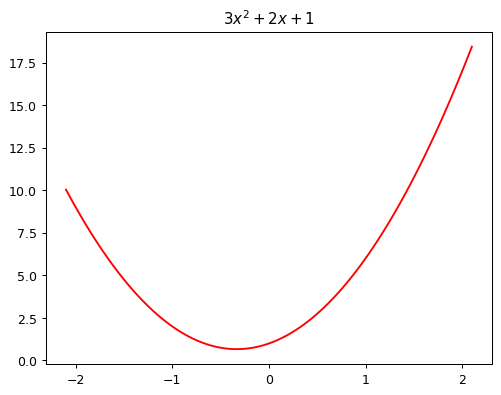

In [42]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [44]:
def quad(a, b, c, x): return a*x**2 + b*x + c


In [45]:
def mk_quad(a,b,c): return partial(quad, a,b,c)


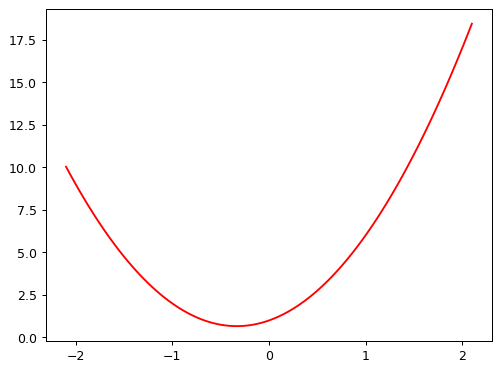

In [46]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [47]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [48]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

In [49]:
x[:5],y[:5]


(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

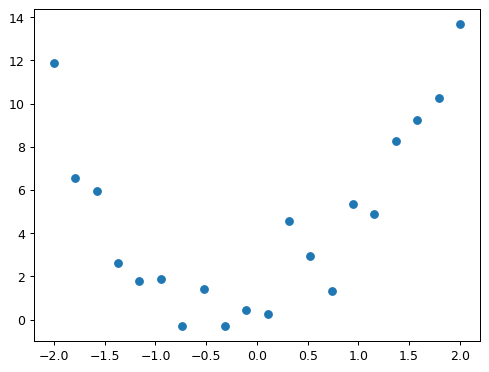

In [50]:
plt.scatter(x,y);


In [51]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [52]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()


In [53]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [54]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [55]:
quad_mae([1.1, 1.1, 1.1])


tensor(2.4219, dtype=torch.float64)

In [56]:
abc = torch.tensor([1.1,1.1,1.1])


In [57]:
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [58]:
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [59]:
loss.backward()

In [60]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [61]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)
    
print(f'loss={loss:.2f}')

loss=2.40


In [62]:
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=2.40
step=1; loss=2.36
step=2; loss=2.30
step=3; loss=2.21
step=4; loss=2.11
step=5; loss=1.98
step=6; loss=1.85
step=7; loss=1.72
step=8; loss=1.58
step=9; loss=1.46


In [63]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

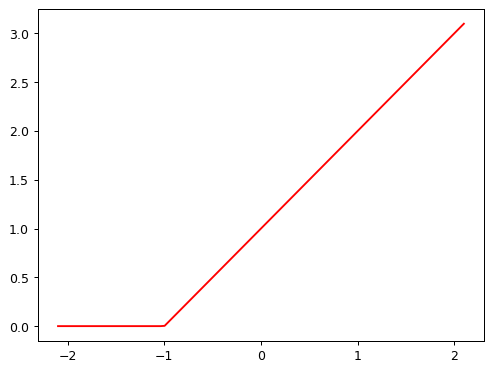

In [64]:
plot_function(partial(rectified_linear, 1,1))

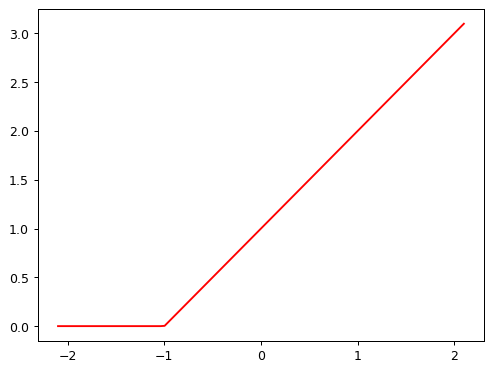

In [65]:
import torch.nn.functional as F
def rectified_linear2(m,b,x): 
  return F.relu(m*x+b)
plot_function(partial(rectified_linear2, 1,1))

In [66]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [67]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…